<a href="https://colab.research.google.com/github/Hjhirp/Re_Search/blob/main/Notebooks/Hackathon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/MINDED HACKATHON

/content/gdrive/MyDrive/MINDED HACKATHON


In [ ]:
#import required stuff
import pandas as pd
import numpy as np

import re #for working with regular expression
import nltk #for natural language processing (nlp)
import spacy #also for nlp
import string #This is a module, Python also has built-in class str, these are different

In [ ]:
df_final = pd.read_csv('df_final.csv')

In [ ]:
df_final.drop(['Authors', 'Year', 'Issue', 'Art. No.', 'Page start', 'Page end',
               'Page count', 'Cited by', 'Link', 'Document Type',
               'Source'],axis=1, inplace=True)

In [ ]:
df_final.columns

Index(['Unnamed: 0', 'Author(s) ID', 'Title', 'Source title', 'Volume',
       'Abstract', 'Author Keywords', 'Index Keywords', 'EID'],
      dtype='object')

In [ ]:
#Read training data
df_cleaned =df_final

#Let us see what do we have.
print(df_cleaned.head(3))
#Note that he have a text column, which we will use n this demo

#Info on the training set
df_cleaned.info()

   Unnamed: 0  ...                 EID
0           0  ...  2-s2.0-85125205060
1           1  ...  2-s2.0-85125119157
2           2  ...  2-s2.0-85125117769

[3 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5000 non-null   int64 
 1   Author(s) ID     5000 non-null   object
 2   Title            5000 non-null   object
 3   Source title     5000 non-null   object
 4   Volume           4953 non-null   object
 5   Abstract         5000 non-null   object
 6   Author Keywords  4448 non-null   object
 7   Index Keywords   4593 non-null   object
 8   EID              5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [ ]:
df_cleaned['Abstract']=df_cleaned['Abstract'].str.lower()
df_cleaned['Title']=df_cleaned['Title'].str.lower()
df_cleaned['Source title']=df_cleaned['Source title'].str.lower()
df_cleaned['Author Keywords']=df_cleaned['Author Keywords'].str.lower()
df_cleaned['Index Keywords']=df_cleaned['Index Keywords'].str.lower()

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words('english')

nltk_stopwords += ['background','amp','recent','however','also','use','using','used']
def text_processor(text):
    # Remove HTML Tags
    try:
        text = html.document_fromstring(text).text_content()
    except:
        pass

    text = text.lower() #lower case
    text = re.sub(r'http\S+', '', text) #remove urls
    text = re.sub('[^a-zA-Z ]+', ' ', text) #remove non-alphabets
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)
    text = re.sub('[\(\[].*?[\)\]]', ' ', text)
    text = re.sub(r"\r\n", "", text)            # Removing additional line
    text = re.sub(r"\n", "", text)              # Removing additional line
    text = re.sub(r"\S*@\S*\s?", "", text)      # Removing email-addresses
    text = re.sub(r'http\S+', '', text)         # Removing website links
    # text = "".join([i for i in text if i not in string.punctuation]) #remove punctuations
    tokens  = re.split(' ', text) #split str into list
    tokens = [t for t in tokens if (t not in nltk_stopwords) and (len(t) > 2)] #remove stopwords and words less than 3 letters

    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatised = [wordnet_lemmatizer.lemmatize(word) for word in tokens] #lemmatise

    output = " ".join(word for word in lemmatised)

    return output

# df_cleaned['cleaned_content'] = df_cleaned['content'].apply(text_processor)

df_cleaned['Abstract']=df_cleaned['Abstract'].apply(text_processor)
df_cleaned['Title']=df_cleaned['Title'].apply(text_processor)
df_cleaned['Source title']=df_cleaned['Source title'].apply(text_processor)
# df_cleaned['Author Keywords']=df_cleaned['Author Keywords'].apply(text_processor)
# df_cleaned['Index Keywords']=df_cleaned['Index Keywords'].apply(text_processor)
# X['cleaned_hashtags'] = X['hashtags'].apply(text_processor)

In [ ]:
freq_dict ={}
text_list = [text for text in df_cleaned['Abstract']]
for sentence in text_list:
  for word in sentence.split():

    if word in freq_dict.keys() and len(word) > 3 and word not in nltk.corpus.stopwords.words('english'):
      freq_dict[word] += 1

    if word not in freq_dict.keys() and len(word) > 3 and word not in nltk.corpus.stopwords.words('english'):
      freq_dict[word] = 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_frequency_charts(df, feature, words, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]

    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))
    g.set(xticklabels=list(df[words]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")

    plt.title('Frequency of {}'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
count_df = pd.DataFrame( freq_dict.values(), freq_dict.keys()).reset_index().rename({0: "Frequency", "index": "Words"}, axis =1)
count_df = count_df.sort_values(by = 'Frequency', ascending = False)[:50]
count_df

,Words,Frequency
241,data,7580
298,model,5883
480,based,4815
323,method,4651
40,result,3841
773,network,3659
918,system,3604
126,proposed,3303
31,study,3268
411,learning,3105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


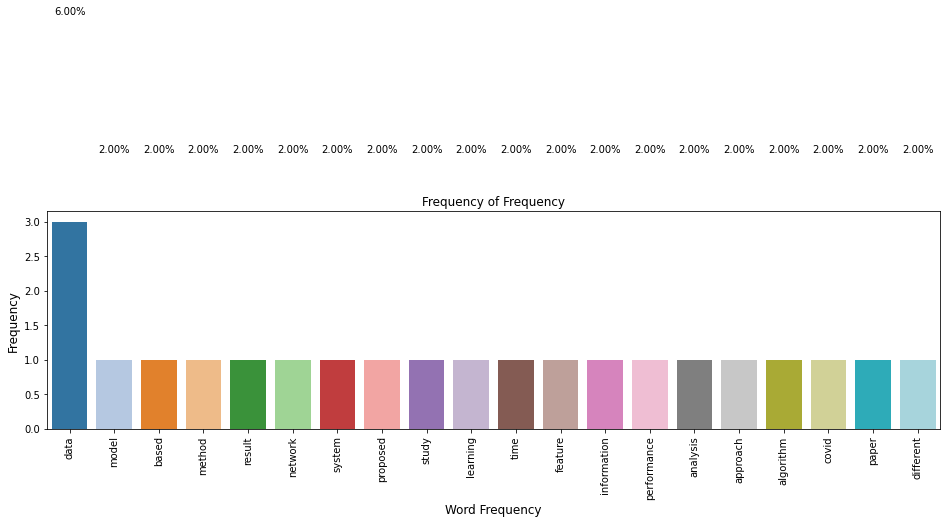

In [ ]:
plot_frequency_charts(count_df, 'Frequency','Words', 'Word Frequency','tab20')

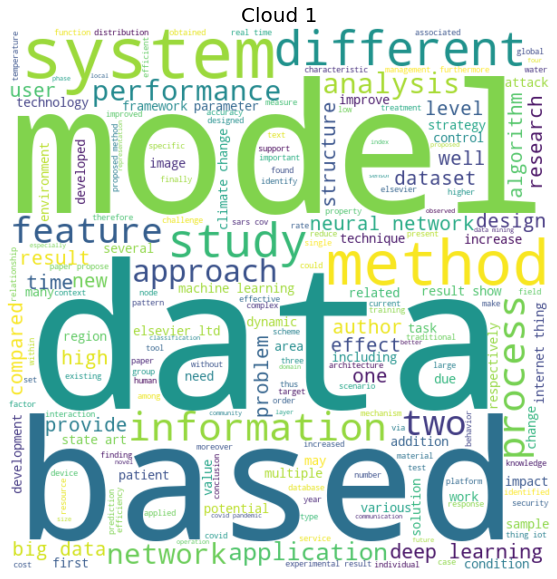

In [ ]:
def create_wordcloud(text_series, title):

    wc = WordCloud(background_color = 'white', stopwords=nltk_stopwords, height = 600, width = 600)
    words = ' '.join(w for w in text_series)
    wc.generate(words)

    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize= 20)
    plt.axis('off')
    plt.show()

create_wordcloud(df_cleaned['Abstract'], 'Cloud 1')
